# Public Life
##### Paolo Hidalgo
---

## Introduction
One of the most important metrics that one must take into consideration when choosing a new area to live in is that neighborhood's public life. A home is much more than just a place to rest before setting off to work in the morning. It’s a place where you meet people, have parties, visit parks, etc. Your public life is important, not just your work. To see which neighborhood in Pittsburgh had the best public life we looked at two different sets of information, public services, and public art. 

Public services because it’s always helpful to have more services near you. Sometimes you may want to go to a public pool or rec center, need help from a shelter, or want to visit a cultural center. Thus, it is helpful and convenient to have these facilities near you. Moreover, the data set used also lists fire houses and medic stations. It can be comforting to know that you live in a neighborhood where if you were to need medical assistance of any kind, you have access to the necessary resources close to your home. More public facilities in a specific area can be representative of how good of a neighborhood it is. 

Public art is important because it simply makes an area look better. An area with more statues, murals, etc. is just more enjoyable to live in. Moreover, more public art can be indicative of other quantities of an area. One could assume that areas with public art have people who care about the community since someone had to either pay someone to create the piece the art to be set up or create the piece of art with others. Overall, more art can be seen as a positive attribute of a neighborhood and thus we can use the amount of public art in an area to determine how good of a neighborhood it is.

## Data Used
-	City of Pittsburgh Facilities: https://data.wprdc.org/datastore/dump/fbb50b02-2879-47cd-abea-ae697ec05170
-	City of Pittsburgh Public Art: https://data.wprdc.org/datastore/dump/00d74e83-8a23-486e-841b-286e1332a151

## Code and Data
This code processes the data in the “Public Life” category of the ranking system. This category is looking at two different data sets. One which looks at the number of public city facilities in a neighborhood and one which looks at the amount of public art in a neighborhood. The more a neighborhood has of either of these two things, the higher that neighborhood will rank. The code is commented and explains every step.

City Facilities:
           Neighborhood Rank
0         Highland Park    1
1   Squirrel Hill South    2
2           Perry North    3
3             Brookline    4
4        Strip District    5
..                  ...  ...
85            Ridgemont   76
86          South Shore   76
87        Spring Garden   76
88            St. Clair   76
89          Summer Hill   76

[90 rows x 2 columns]


Public Art:
                 Neighborhood Rank
0   Central Business District    1
1         Squirrel Hill South    2
2            Allegheny Center    3
3               Highland Park    4
4            South Side Flats    5
..                        ...  ...
85                Summer Hill   56
86            Terrace Village   56
87               West Oakland   56
88                   Westwood   56
89                    Windgap   56

[90 rows x 2 columns]




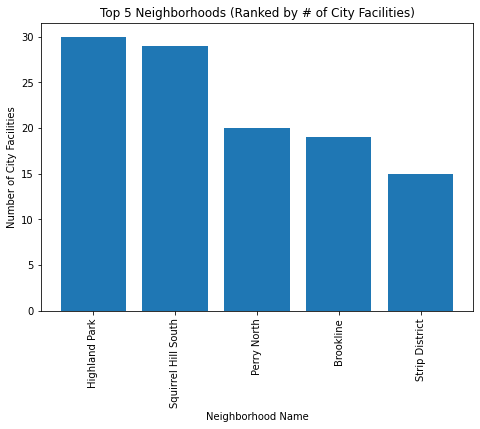

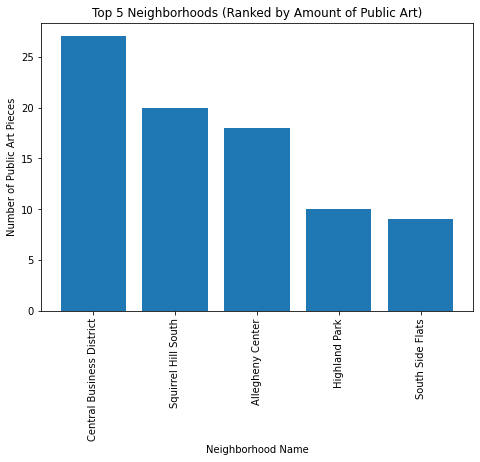

In [3]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def main():
    # Create data frames
    facilities = pd.read_csv("City Facilities.csv")
    art = pd.read_csv("City of Pittsburgh Public Art.csv")

    # Create new dara frames with neighborhoods ranked
    facilities_ranked = rank_data(facilities) # The ranking is based on how many facilities a neighborhood has.
                                              # More facilities equates to a better rank. 
    art_ranked = rank_data(art) # The ranking is based on how many pieces of public art a neighborhood has.
                                # More art equates to a better rank. 
    
    # Save df in csv files
    facilities_ranked.to_csv("facilities_ranked.csv", index = False)
    art_ranked.to_csv("art_ranked.csv", index = False)
    
    # Display the ranked data frames
    print("City Facilities:")
    print(facilities_ranked)
    
    print("\n")
    
    print("Public Art:")
    print(art_ranked)
    
    print("\n==================================\n")
    
    facilities_bar = plt.figure().add_axes([0,0,1,1])
    load_bar(facilities_bar, facilities) # add data to bar graph
    facilities_bar.set_title("Top 5 Neighborhoods (Ranked by # of City Facilities)")
    facilities_bar.set_xlabel("Neighborhood Name")
    facilities_bar.set_ylabel("Number of City Facilities")
    plt.xticks(rotation = 90)
    plt.show()
    
    print("\n")
        
    art_bar = plt.figure().add_axes([0, 0, 1, 1])
    load_bar(art_bar, art) # add data to bar graph
    art_bar.set_title("Top 5 Neighborhoods (Ranked by Amount of Public Art)")
    art_bar.set_xlabel("Neighborhood Name")
    art_bar.set_ylabel("Number of Public Art Pieces")
    plt.xticks(rotation = 90)
    plt.show()

    
def rank_data(df):
    df_ranked = pd.DataFrame(columns=['Neighborhood', 'Rank'])
        
    # Rank neighborhoods in df
    i = 0
    for n, r in df["neighborhood"].value_counts().sort_values(ascending = False).iteritems():
        df_ranked.at[i, "Neighborhood"] = n
        df_ranked.at[i, "Rank"] = i + 1
        i += 1
         
    # Rank neighborhoods not in df
    r = i + 1
    for n in open('neighborhoods.txt', 'r').read().splitlines():
        # If neighborhood not in file, add it to the end
        if not(df_ranked["Neighborhood"].str.contains(n).any()):
            df_ranked.at[i, "Neighborhood"] = n
            df_ranked.at[i, "Rank"] = r
            i += 1
       
    return df_ranked

def load_bar(ax, df):
    x = [0, 0, 0, 0, 0] # Array for x-axis. Holds neighborhood names.
    y = [0, 0, 0, 0, 0] # Array for y-axis. Holds neighborhood data. 
    
    # Rank neighborhoods and their data to axis
    i = 0
    for n, d in df["neighborhood"].value_counts().sort_values(ascending = False).iteritems():
        if i >= 5:
            ax.bar(x, y)
            return
        else:
            x[i] = n;
            y[i] = d;
            i += 1
            
main()

## Analysis and Conclusion
After analyzing the data with python, we now can see the top 5 neighborhoods as determined by the number of city facilities or public art available. When looking at this data we see two neighborhoods in particular rank very high. First with the best score is Squirrel Hill South and with the second-best score Highland Park. One can thus assume these neighborhoods are great places to live in. Especially if public life is an important factor to you. As previously mentioned, this was determined by analyzing the number of city facilities and public art pieces within every neighborhood in Pittsburgh. Upon some further research on niche.com, both neighborhoods score high with an overall score of A+ (see below for source). This just further goes to consolidate our findings and show us how these neighborhoods are among some of the best areas to live in Pittsburgh. However, this doesn’t mean these neighborhoods are necessarily the best in Pittsburgh. However, when it comes to public life in these neighborhoods, we can say Squirrel Hill South is the best and Highland Park a close second. 

References: \
https://www.niche.com/places-to-live/n/squirrel-hill-south-pittsburgh-pa/ \
https://www.niche.com/places-to-live/n/highland-park-pittsburgh-pa/ 